In [83]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

In [84]:
datos = pd.read_csv('consulta2.csv')
estados = datos['estado_desc'].unique()
datos


,estado_desc,mes_desc,ganancia_total
0,Baja California,"""Enero 2018""",9.950156e+06
1,Sinaloa,"""Enero 2018""",7.217590e+06
2,Yucatan,"""Enero 2018""",1.408995e+06
3,Veracruz de Ignacio de la Llave,"""Enero 2018""",4.888718e+06
4,Tamaulipas,"""Enero 2018""",5.524328e+06
...,...,...,...
423,Baja California,"""Mayo 2020""",2.361477e+03
424,Chiapas,"""Mayo 2020""",2.119084e+03
425,Veracruz de Ignacio de la Llave,"""Mayo 2020""",5.195880e+05
426,Coahuila de Zaragoza,"""Mayo 2020""",2.113067e+06


In [85]:

 
predicciones = {}
for estado in estados:
    datos_estado = datos[datos['estado_desc']==estado]
    if  "Mayo 2020" not in datos_estado['mes_desc'].values[-1]:
        predicciones[estado] = 0
        continue
    ses = ExponentialSmoothing(datos_estado.ganancia_total.values,seasonal_periods=12).fit()
    ses_p = ses.forecast(1)
    predicciones[estado] = ses_p
    #datos_estado.plot(kind='line', figsize=(20,9))
    #ses_p.plot(kind='line')

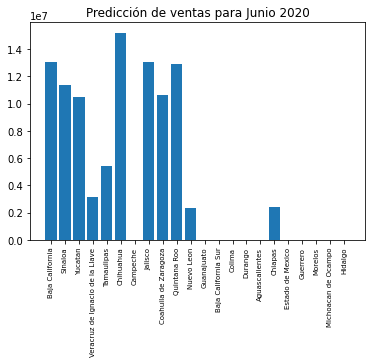

In [90]:
plt.bar(predicciones.keys(),predicciones.values())
plt.xticks(rotation=90,size=7)
plt.title('Predicción de ventas para Junio 2020')
plt.show()

In [89]:
print('La mayor ganancia esperada para el mes de Junio 2020 es \n Chihuahua con ganancias de:',predicciones['Chihuahua'][0])

La mayor ganancia esperada para el mes de Junio 2020 es 
 Chihuahua con ganancias de: 15206448.254351635


In [95]:
print('Porcentaje de aportación a las ganancias totales:\n',predicciones['Chihuahua'][0]/sum(predicciones.values())[0])

Porcentaje de aportación a las ganancias totales:
 0.1520874991239482


array([99984866.22466381])